In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, mean_squared_error
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from tensorflow.keras.callbacks import EarlyStopping

import json
import os
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
from IPython.display import display

drive.mount('/content/drive')
diretorio = '/content/drive/MyDrive/Redes Neurais/DATA/'
diretorio2 = '/content/drive/MyDrive/Redes Neurais/'

Mounted at /content/drive


In [4]:
X_t = np.load(diretorio+'X_train.npy')
y_t = np.load(diretorio+'y_train.npy')

X_v = np.load(diretorio+'X_test.npy')
y_v = np.load(diretorio+'y_test.npy')

X_t.shape, y_t.shape

((8640, 100, 52), (8640, 52))

In [5]:
model = Sequential()

model.add(InputLayer((100, 52)))
model.add(LSTM(200))
model.add(Dense(512, 'relu'))
model.add(Dense(128, 'sigmoid'))
model.add(Dense(52, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               202400    
                                                                 
 dense (Dense)               (None, 512)               102912    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 52)                6708      
                                                                 
Total params: 377,684
Trainable params: 377,684
Non-trainable params: 0
_________________________________________________________________


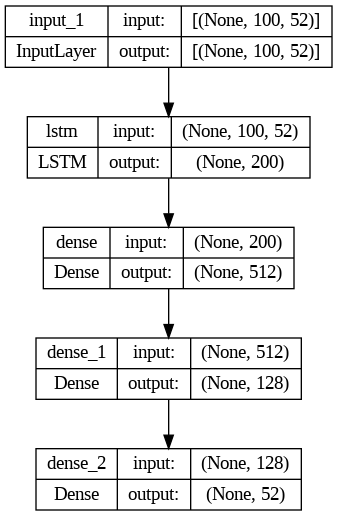

In [6]:
plot_model(model, show_shapes=True)

In [7]:
EPOCHS = 100
batch_size = 64
patience = 20 #no improvement patience

In [ ]:
model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

earlystopper = EarlyStopping(monitor='loss', patience=patience, restore_best_weights=True, verbose=0)

history = model.fit(X_t, y_t, batch_size=batch_size, epochs=EPOCHS, callbacks=[earlystopper], validation_data=(X_v, y_v))

Epoch 1/100
135/135 [==============================] - 10s 19ms/step - loss: 0.0329 - root_mean_squared_error: 0.1815 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0918
Epoch 2/100
135/135 [==============================] - 2s 13ms/step - loss: 0.0028 - root_mean_squared_error: 0.0532 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0678
Epoch 3/100
135/135 [==============================] - 2s 14ms/step - loss: 0.0015 - root_mean_squared_error: 0.0386 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0623
Epoch 4/100
135/135 [==============================] - 2s 13ms/step - loss: 8.5167e-04 - root_mean_squared_error: 0.0292 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0607
Epoch 5/100
135/135 [==============================] - 2s 14ms/step - loss: 5.4554e-04 - root_mean_squared_error: 0.0234 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0546
Epoch 6/100
 50/135 [==========>...................] - ETA: 0s - loss: 3.9337e-04 - root_mean_squared_error: 0.0198

In [ ]:
predictions = model.predict(X_v)
predictions.shape

In [ ]:
path_to_save = '/content/drive/MyDrive/Redes Neurais/results/LSTM/multi/sensor_'
try:
    os.remove(path_to_save+".json")
except FileNotFoundError:
    pass

final_result = {}
final_result['Model'] = 'LSTM-multi'

for i in range(len(predictions[0])):
  final_result['Sensor'] = i
  final_result['Model'] = 'LSTM-multi'
  final_result['MSE_val_final'] = mean_squared_error(y_v[:,i], predictions[:,i]).numpy().tolist()

  with open(path_to_save+".json", "a") as arquivo:
    json.dump(final_result, arquivo)

In [ ]:


plt.plot(history.history['root_mean_squared_error'], label='RME')
plt.plot(history.history['val_root_mean_squared_error'], label = 'val_RME')

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss/RME')
plt.legend(loc='lower right')
plt.savefig(path_to_save+'_loss.png')

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

In [ ]:
predictions = model.predict(X_v)

predictions.shape

In [ ]:
r = random.randint(0,51)
plt.plot(predictions[:,r])
plt.plot(y_v[:,r])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_prediction(original_data, predicted_data):
    """
    Plots the original time series, predicted time series, difference between them, and the absolute difference.
    Returns:
        None (displays the plot)
    """

    # Convert data to numpy arrays if they are DataFrames
    if isinstance(original_data, pd.DataFrame):
        original_data = original_data.values
    if isinstance(predicted_data, pd.DataFrame):
        predicted_data = predicted_data.values

    # Compute the difference between the original and predicted data
    diff = original_data - predicted_data
    abs_diff = np.abs(diff)  # Compute the absolute difference

    # Get the number of time series
    num_series = original_data.shape[1]

    # Create subplots for the plots of each time series
    fig, axes = plt.subplots(nrows=num_series, ncols=1, figsize=(10, 5*num_series))
    plt.tight_layout(pad=1.0)

    # Iterate over each time series
    for i in range(num_series):
        ax = axes[i]

        # Plot the original data
        ax.plot(original_data[:, i], label='Original')

        # Plot the predicted data
        ax.plot(predicted_data[:, i], label='Predicted')

        # Plot the difference between original and predicted data
        ax.plot(diff[:, i], label='Difference')

        # Plot the absolute difference
        ax.plot(abs_diff[:, i], label='Absolute Difference')

        # Set the title and legend for each subplot
        ax.set_title(f'Time Series {i+1}')
        ax.legend()
        plt.savefig('/content/drive/MyDrive/Redes Neurais/results/LSTM/multi/sensor_'+str(i)+'_diff.png')
        print('.',end='')

    # Display the plot

    plt.show()

In [ ]:
plot_prediction(y_v, predictions)

In [ ]:
from datetime import datetime
import pytz

# Get the current time in Brazil's time zone
brazil_tz = pytz.timezone('America/Sao_Paulo')
current_time = datetime.now(brazil_tz)

# Print the current time
print(current_time)
